In [ ]:
import pandas as pd
df=pd.read_csv('/content/position-salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
df.isnull().sum()


Position    0
Level       0
Salary      0
dtype: int64

In [ ]:
df.info


<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [ ]:
X=df.iloc[:,1:-1]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
y=df.iloc[:,-1]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X,y)
y_pred=lin.predict(X)
print(y_pred)

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


Text(0.5, 1.0, 'level Vs salary')

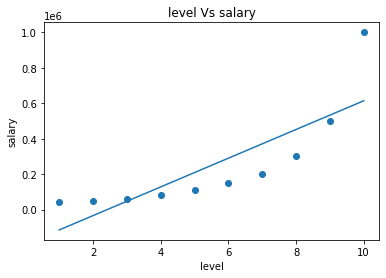

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.xlabel("level")
plt.ylabel("salary")
plt.title("level Vs salary")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
X_poly=poly.fit_transform(X)
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [ ]:
lin2=LinearRegression()
lin2.fit(X_poly,y)

LinearRegression()

In [ ]:
y_poly=lin2.predict(X_poly)
y_poly

array([ 43895.104896  ,  53836.82983716,  57065.26806576,  77286.71328742,
       112263.40326409, 152736.59673701, 201349.65034962, 291571.09557059,
       506617.71561667, 998377.62237571])

Text(0.5, 1.0, 'level Vs salary')

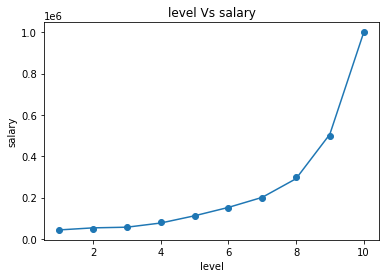

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,y_poly)
plt.xlabel("level")
plt.ylabel("salary")
plt.title("level Vs salary")


In [ ]:
pred_df=pd.DataFrame({'Actual':y,'pred(Sim)':y_pred,'pred(poly)':y_poly})
pred_df

,Actual,pred(Sim),pred(poly)
0,45000,-114454.545455,43895.104896
1,50000,-33575.757576,53836.829837
2,60000,47303.030303,57065.268066
3,80000,128181.818182,77286.713287
4,110000,209060.606061,112263.403264
5,150000,289939.393939,152736.596737
6,200000,370818.181818,201349.650350
7,300000,451696.969697,291571.095571
8,500000,532575.757576,506617.715617
9,1000000,613454.545455,998377.622376


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("simple linear regression",mean_absolute_error(y,y_pred))
print("polynomial regression",mean_squared_error(y,y_poly))

simple linear regression 128454.54545454546
polynomial regression 16382284.38228566


In [ ]:
import numpy as np
print("simple  linear regression",np.sqrt(mean_squared_error(y,y_pred)))
print("polynomial regression",np.sqrt(mean_squared_error(y,y_pred)))

simple  linear regression 163388.73519272613
polynomial regression 163388.73519272613


In [ ]:
y_new=lin2.predict(poly.fit_transform([[70]]))
y_new

array([1.91465632e+11])

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y,y_poly))

0.9997969027099755


In [ ]:
print(r2_score(y,y_pred))

0.6690412331929895
